In [1]:
from datetime import date
import matplotlib.pyplot as plt
import pandas as pd
import sys
import numpy as np
from matplotlib.ticker import ScalarFormatter
import math

%matplotlib inline

In [2]:
today_str = date.today().strftime("%d%B%Y")
datafile = 'sd_covid_dataset.csv'

In [3]:
df = pd.read_csv(datafile) 

## Total cases in San Diego

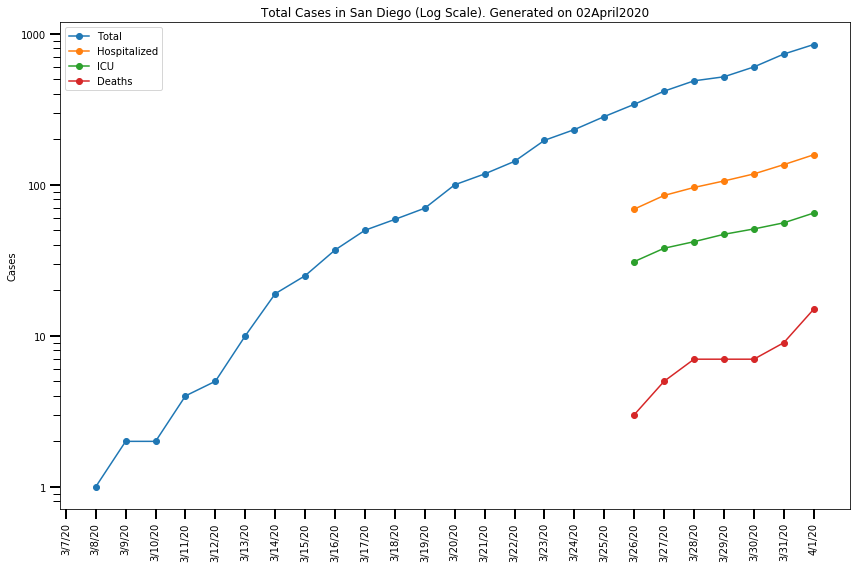

In [4]:
f, ax = plt.subplots(figsize=(12,8))
ax.plot(df['date'], df['sd_total'], '-o', label="Total")
ax.plot(df['date'], df['sd_hosp'], '-o', label="Hospitalized")
ax.plot(df['date'], df['sd_icu'], '-o', label="ICU")
ax.plot(df['date'], df['sd_death'], '-o', label="Deaths")

plt.ylabel("Cases")
plt.legend(loc='upper left')
plt.xticks(rotation='vertical')
plt.yscale('log')
plt.title('Total Cases in San Diego (Log Scale). Generated on '+today_str)
plt.tick_params(direction='out', length=10, width=2)
plt.tick_params(direction='out', length=7, width=1, which='minor')
ax.yaxis.set_major_formatter(ScalarFormatter())
plt.tight_layout()
plt.savefig("./plots/totalcasesinSanDiego_outcomedetail_logscale_"+today_str+".png")

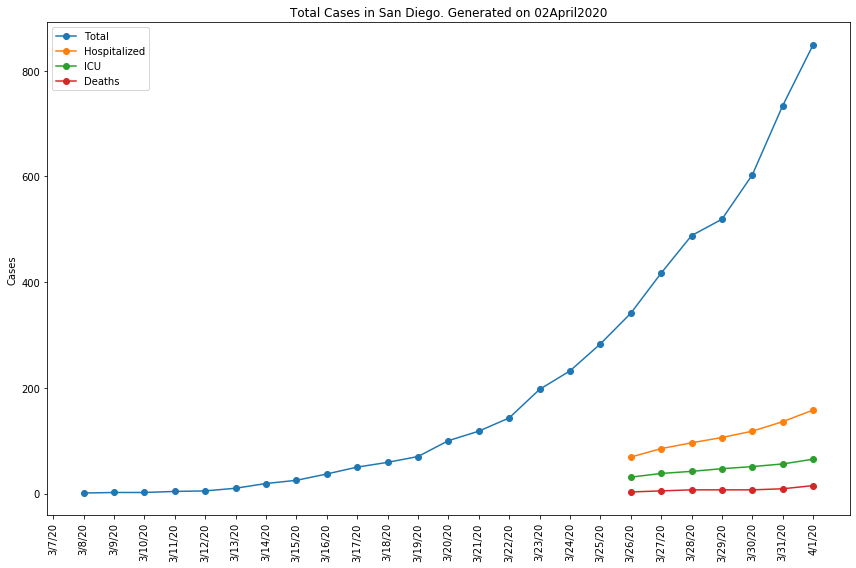

In [5]:
f, ax = plt.subplots(figsize=(12,8))
ax.plot(df['date'], df['sd_total'], '-o', label="Total")
ax.plot(df['date'], df['sd_hosp'], '-o', label="Hospitalized")
ax.plot(df['date'], df['sd_icu'], '-o', label="ICU")
ax.plot(df['date'], df['sd_death'], '-o', label="Deaths")

plt.ylabel("Cases")
plt.legend(loc='upper left')
plt.xticks(rotation='vertical')
plt.title('Total Cases in San Diego. Generated on '+today_str)
plt.tight_layout()
plt.savefig("./plots/totalcasesinSanDiego_outcomedetail_"+today_str+".png")

## Breakdown by region

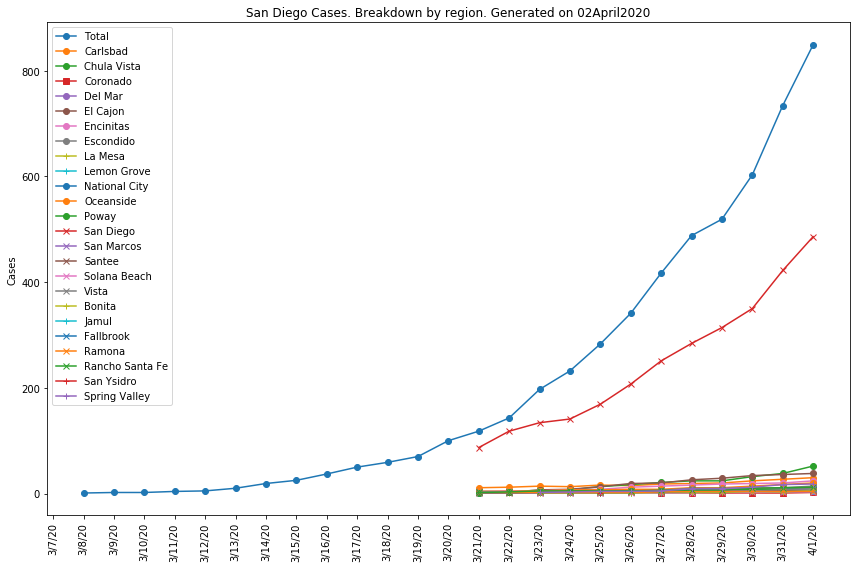

In [6]:
f, ax = plt.subplots(figsize=(12,8))
ax.plot(df['date'], df['sd_total'], '-o', label="Total")
ax.plot(df['date'], df['carlsbad'], '-o', label="Carlsbad")
ax.plot(df['date'], df['chulavista'], '-o', label="Chula Vista")
ax.plot(df['date'], df['coronado'], '-s', label="Coronado")
ax.plot(df['date'], df['delmar'], '-o', label="Del Mar")
ax.plot(df['date'], df['elcajon'], '-o', label="El Cajon")
ax.plot(df['date'], df['encinitas'], '-o', label="Encinitas")
ax.plot(df['date'], df['escondido'], '-o', label="Escondido")
ax.plot(df['date'], df['lamesa'], '-+', label="La Mesa")
ax.plot(df['date'], df['lemongrove'], '-+', label="Lemon Grove")
ax.plot(df['date'], df['nationalcity'], '-o', label="National City")
ax.plot(df['date'], df['oceanside'], '-o', label="Oceanside")
ax.plot(df['date'], df['poway'], '-o', label="Poway")
ax.plot(df['date'], df['sandiego'], '-x', label="San Diego")
ax.plot(df['date'], df['sanmarcos'], '-x', label="San Marcos")
ax.plot(df['date'], df['santee'], '-x', label="Santee")
ax.plot(df['date'], df['solanabeach'], '-x', label="Solana Beach")
ax.plot(df['date'], df['vista'], '-x', label="Vista")
ax.plot(df['date'], df['bonita'], '-+', label="Bonita")
ax.plot(df['date'], df['jamul'], '-+', label="Jamul")
ax.plot(df['date'], df['fallbrook'], '-x', label="Fallbrook")
ax.plot(df['date'], df['ramona'], '-x', label="Ramona")
ax.plot(df['date'], df['ranchosantafe'], '-x', label="Rancho Santa Fe")
ax.plot(df['date'], df['sanysidro'], '-+', label="San Ysidro")
ax.plot(df['date'], df['springvalley'], '-+', label="Spring Valley")
plt.ylabel("Cases")
plt.legend(loc='upper left')
plt.xticks(rotation='vertical')
plt.title('San Diego Cases. Breakdown by region. Generated on '+today_str)
plt.tight_layout()
plt.savefig("./plots/breakdownbyregion_"+today_str+".png")

## By Sex 

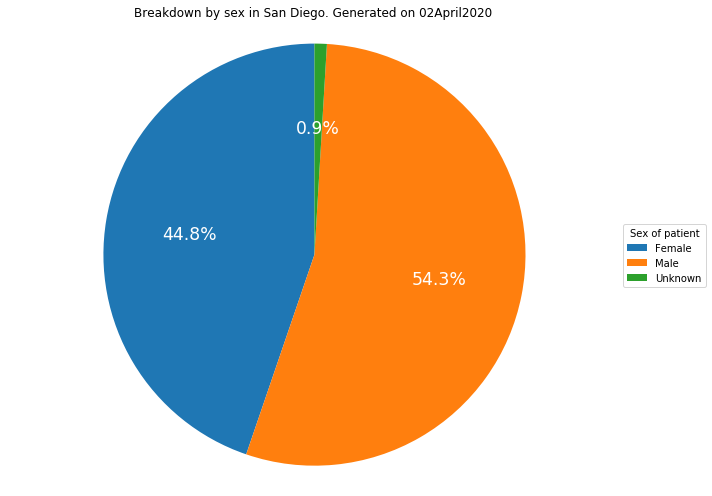

In [7]:
currentstate = df.tail(1).fillna(0)
labels = 'Female', 'Male', 'Unknown'

female=currentstate['sd_fem'].iloc[0]
male=currentstate['sd_male'].iloc[0]
unk=currentstate['sd_sex_unk'].iloc[0]
sizes = [female, male, unk]

f, ax = plt.subplots(figsize=(10,7))
wedges, texts, autotexts = ax.pie(sizes, autopct='%1.1f%%', startangle=90, textprops=dict(color="w", size='xx-large'))
ax.legend(wedges, labels, title="Sex of patient",
          loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
ax.axis('equal')
plt.title('Breakdown by sex in San Diego. Generated on '+today_str)
plt.tight_layout()
plt.savefig("./plots/sexaffectedSanDiego_"+today_str+".png")

## By Age Group

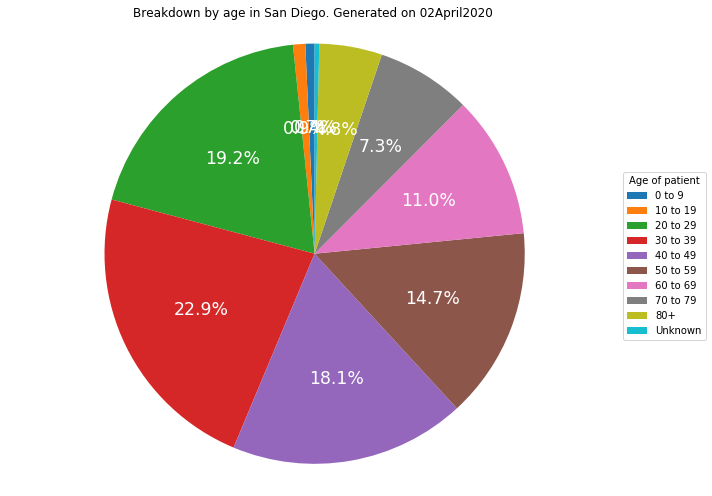

In [8]:
currentstate = df.tail(1).fillna(0)
labels = '0 to 9', '10 to 19', '20 to 29', '30 to 39', '40 to 49', '50 to 59', '60 to 69', '70 to 79', '80+', 'Unknown'

a0to9 = currentstate['sd_0to9'].iloc[0]
a10to19=currentstate['sd_10to19'].iloc[0]
a20to29=currentstate['sd_20to29'].iloc[0]
a30to39=currentstate['sd_30to39'].iloc[0]
a40to49=currentstate['sd_40to49'].iloc[0]
a50to59=currentstate['sd_50to59'].iloc[0]
a60to69=currentstate['sd_60to69'].iloc[0]
a70to79=currentstate['sd_70to79'].iloc[0]
a80plus=currentstate['sd_80plus'].iloc[0]
unk=currentstate['sd_age_unk'].iloc[0]
sizes = [a0to9, a10to19, a20to29, a30to39, a40to49, a50to59, a60to69, a70to79, a80plus, unk]

f, ax = plt.subplots(figsize=(10,7))

wedges, texts, autotexts = ax.pie(sizes, autopct='%1.1f%%', startangle=90, textprops=dict(color="w", size='xx-large'))
ax.legend(wedges, labels, title="Age of patient",
          loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
          
ax.axis('equal')

plt.title('Breakdown by age in San Diego. Generated on '+today_str)
plt.tight_layout()
plt.savefig("./plots/ageaffectedSanDiego_"+today_str+".png")

## Daily new cases

In [9]:
tc = df['sd_total']
th = df['sd_hosp']
ti = df['sd_icu']
td = df['sd_death']

dnc = [None] * len(tc)
dnh = [None] * len(tc)
dni = [None] * len(tc)
dnd = [None] * len(tc)
 
for i in range(len(tc)):
    if(i== 0):
        dnc[i] = tc[i]
        dnh[i] = th[i]
        dni[i] = ti[i]
        dnd[i] = td[i]
    else:
        dnc[i] = tc[i] - tc[i-1]
        dnh[i] = th[i] - th[i-1]
        dni[i] = ti[i] - ti[i-1]
        dnd[i] = td[i] - td[i-1]
        

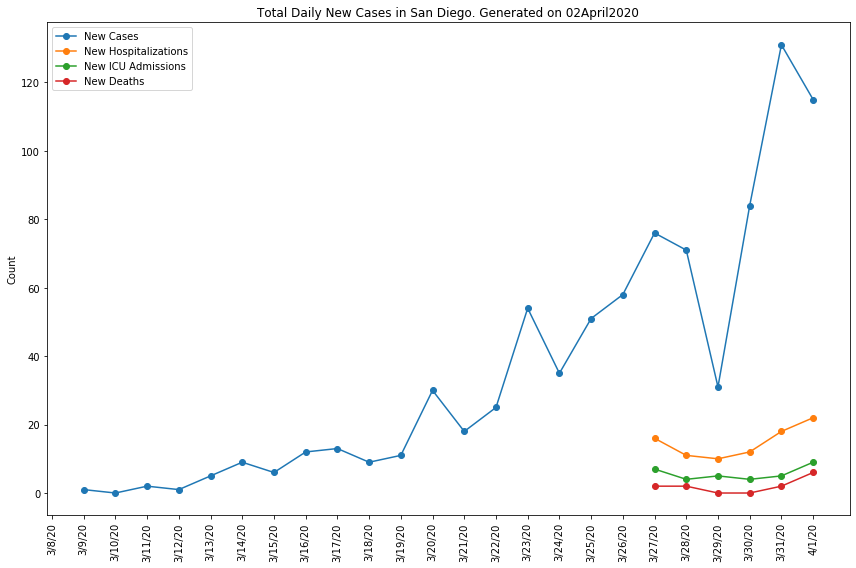

In [10]:
f, ax = plt.subplots(figsize=(12,8))
ax.plot(df['date'], dnc, '-o', label="New Cases")
ax.plot(df['date'], dnh, '-o', label="New Hospitalizations")
ax.plot(df['date'], dni, '-o', label="New ICU Admissions")
ax.plot(df['date'], dnd, '-o', label="New Deaths")
plt.ylabel("Count")
plt.legend(loc='upper left')
plt.xticks(rotation='vertical')
plt.title('Total Daily New Cases in San Diego. Generated on '+today_str)
plt.tight_layout()
plt.savefig("./plots/totalnewcasesinSanDiego_outcomedetail_"+today_str+".png")

## Testing

In [11]:
tested = df['tested']
negative = [float('nan')] * len(tested)
for i in range(len(tested)):
    if(not math.isnan(tested[i]) and not math.isnan(dnc[i])):
        negative[i] = tested[i] - dnc[i]
    
        if(negative[i] < 0):
            negative[i] = 0

In [12]:
nf = [x if not math.isnan(x) else 0 for x in negative]
negative_total = [0] * len(nf)
for i in range(len(nf)):
    if(i == 0):
        negative_total[i] = nf[i]
    else:
        negative_total[i] = nf[i] + negative_total[i-1]

In [13]:
tf = tested.fillna(0)
testing_total = [0] * len(tf)
for i in range(len(tf)):
    if(i == 0):
        testing_total[i] = tf[i]
    else:
        testing_total[i] = tf[i] + testing_total[i-1]

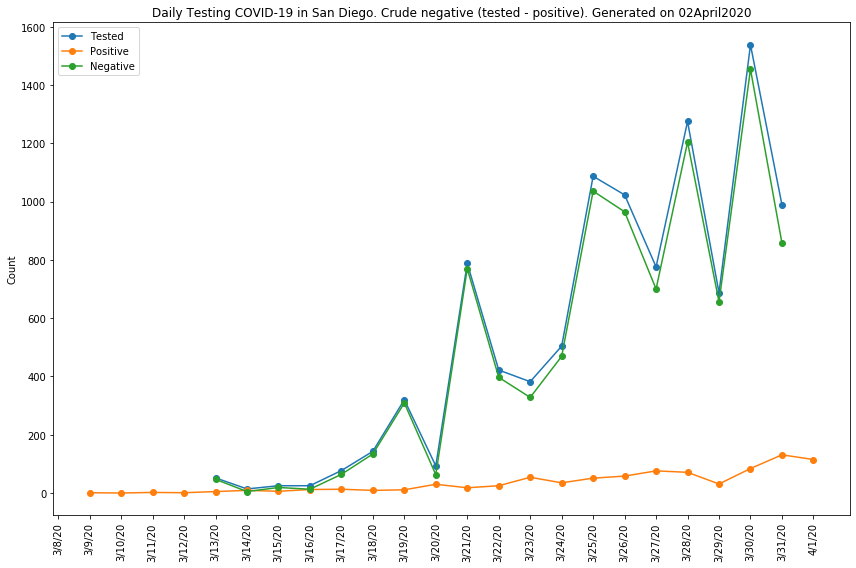

In [14]:
f, ax = plt.subplots(figsize=(12,8))
ax.plot(df['date'], tested, '-o', label="Tested")
ax.plot(df['date'], dnc, '-o', label="Positive")
ax.plot(df['date'], negative, '-o', label="Negative")

plt.ylabel("Count")
plt.legend(loc='upper left')
plt.xticks(rotation='vertical')
plt.title('Daily Testing COVID-19 in San Diego. Crude negative (tested - positive). Generated on '+today_str)
plt.tight_layout()
plt.savefig("./plots/testing_SanDiego_"+today_str+".png")

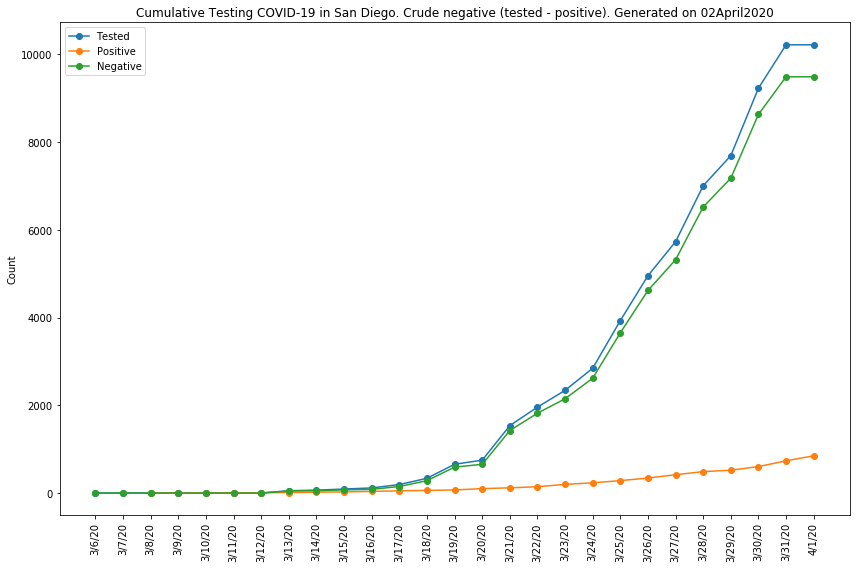

In [15]:
f, ax = plt.subplots(figsize=(12,8))
ax.plot(df['date'], testing_total, '-o', label="Tested")
ax.plot(df['date'], tc, '-o', label="Positive")
ax.plot(df['date'], negative_total, '-o', label="Negative")

plt.ylabel("Count")
plt.legend(loc='upper left')
plt.xticks(rotation='vertical')
plt.title('Cumulative Testing COVID-19 in San Diego. Crude negative (tested - positive). Generated on '+today_str)
plt.tight_layout()
plt.savefig("./plots/cumulativetesting_SanDiego_"+today_str+".png")

### Active Cases

In [16]:
ac = [None] * len(tc)
tc_nozero = tc.fillna(0)
dnc_nozero = [x if not math.isnan(x) else 0 for x in dnc ]

for i in range(len(tc)):
    if i < 14:
        ac[i] = tc_nozero[i]
    else:
        start = i-14
        end = i
        ac_tot = 0
        for pos in range(start,end):
            ac_tot += dnc_nozero[pos]
        ac[i] = ac_tot   
        
            
        
        
        

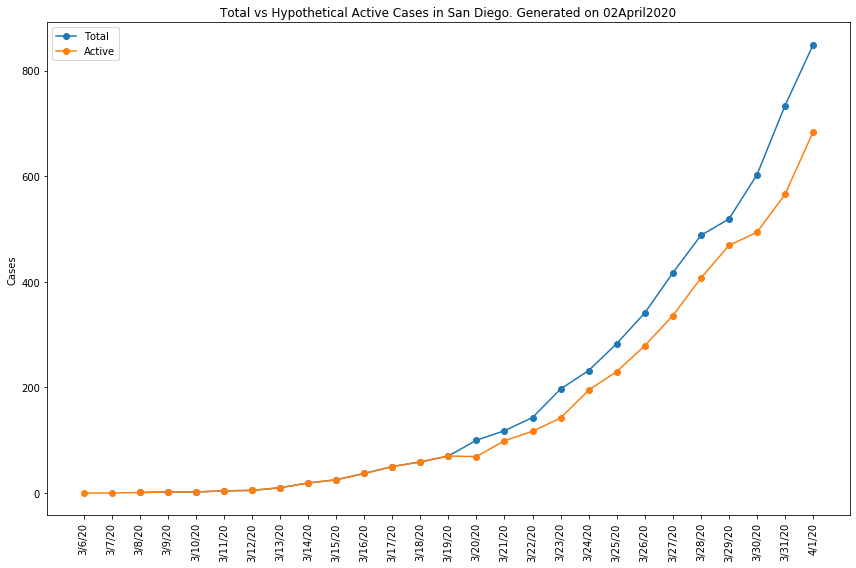

In [18]:
f, ax = plt.subplots(figsize=(12,8))
ax.plot(df['date'], tc, '-o', label="Total")
ax.plot(df['date'], ac, '-o', label="Active")

plt.ylabel("Cases")
plt.legend(loc='upper left')
plt.xticks(rotation='vertical')
plt.title('Total vs Hypothetical Active Cases in San Diego. Generated on '+today_str)
plt.tight_layout()
plt.savefig("./plots/totalvsactive_SanDiego_"+today_str+".png")